In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

import pandas_profiling

from geopy.geocoders import Nominatim

import seaborn as sns

Brazilian Dataset - INPE

First, lets, take a quick look in to the dataset:

In [2]:
#fires_inpe = pd.read_csv("datasets/Focos_2019.csv") 

fires_inpe = pd.read_csv("../Datasets/Focos_2019.csv") #tab

In [3]:
fires_inpe.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/09/03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.80126,2.2
1,2019/09/03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.12546,5.5
2,2019/09/03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.60860,5.2
3,2019/09/03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.04727,4.9
4,2019/09/03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.05195,4.9


In [4]:
fires_inpe.shape

(1807610, 12)

In [5]:
#fires_inpe.profile_report()

In [6]:
#Checking the missing values:

fires_inpe.isna().sum()

datahora              0
satelite              0
pais                  0
estado                0
municipio             0
bioma                 0
diasemchuva        6484
precipitacao          0
riscofogo          7963
latitude              0
longitude             0
frp             1021764
dtype: int64

In [7]:
#checking the representativity of those missing values:

#First the frp: that is the column that i problebly will use as target:

1021764/1807610 #more than 50% of my information about Fire Radiative Power (FRP) is missing, but since i have a lot of information, let´s think if could be a problemn only use what i have. 

0.5652568861646041

In [8]:
#diasemchuva

6484/1801126

0.0035999702408382314

In [9]:
#riscofogo

7963/1799647

0.004424756632828549

In [10]:
fires_inpe.count()

datahora        1807610
satelite        1807610
pais            1807610
estado          1807610
municipio       1807610
bioma           1807610
diasemchuva     1801126
precipitacao    1807610
riscofogo       1799647
latitude        1807610
longitude       1807610
frp              785846
dtype: int64

In [11]:
fires_inpe[fires_inpe.frp.isna()]

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
1593,2019/09/03 20:04:29,GOES-16,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,0.0,0.0,0.0,-9.08000,-50.810000,NaN
1615,2019/09/03 20:04:28,GOES-16,Brasil,PARA,SAO FELIX DO XINGU,Amazonia,0.0,0.0,0.0,-9.20000,-51.560000,NaN
1634,2019/09/03 20:05:12,GOES-16,Brasil,PARA,TOME-ACU,Amazonia,0.0,0.0,0.0,-2.54000,-48.390000,NaN
1635,2019/09/03 20:05:12,GOES-16,Brasil,PARA,TOME-ACU,Amazonia,0.0,0.0,0.0,-2.54000,-48.370000,NaN
1636,2019/09/03 20:05:02,GOES-16,Brasil,PARA,RUROPOLIS,Amazonia,0.0,0.0,0.0,-3.95000,-54.840000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1807538,2020/01/01 15:55:54,NOAA-20,Brasil,PARA,MUANA,Amazonia,0.0,0.0,0.0,-1.38261,-49.358050,NaN
1807606,2020/01/01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22556,-59.602360,NaN
1807607,2020/01/01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22841,-59.597570,NaN
1807608,2019/12/28 01:33:50,METOP-C,Brasil,MATO GROSSO,ALTA FLORESTA,Amazonia,0.0,0.0,0.0,-10.19410,-56.578701,NaN


In [12]:
(len([fires_inpe.isna().any(axis = 1)]) / len(fires_inpe)) * 100

5.532166783764197e-05

Droping the Nas:

In [13]:
fires_inpe_clean = fires_inpe.dropna()


In [14]:
#checking if worked:
fires_inpe_clean.isna().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
dtype: int64

In [15]:
fires_inpe_clean.head()
len(fires_inpe_clean)

777078

In [16]:
fires_inpe_clean.count()

datahora        777078
satelite        777078
pais            777078
estado          777078
municipio       777078
bioma           777078
diasemchuva     777078
precipitacao    777078
riscofogo       777078
latitude        777078
longitude       777078
frp             777078
dtype: int64

In [17]:
fires_inpe_clean.dtypes

datahora         object
satelite         object
pais             object
estado           object
municipio        object
bioma            object
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object

In [18]:
fires_inpe_clean.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,777078.000000,777078.000000,777078.000000,777078.000000,777078.000000,777078.000000
mean,9.635577,0.869982,3.045050,-6.735394,-57.209251,20.438250
std,15.831847,3.431525,44.712279,4.436323,6.174873,63.320977
min,0.000000,0.000000,0.000000,-16.289110,-73.667600,0.000000
25%,0.000000,0.000000,0.000000,-9.791000,-61.616000,3.000000
50%,3.000000,0.000000,0.430000,-7.827635,-56.942440,7.400000
75%,12.000000,0.050000,0.960000,-3.715000,-52.073420,17.700000
max,120.000000,88.830000,777.700000,5.194490,-43.653920,6980.100000


In [19]:
clean2 = fires_inpe_clean.groupby(['estado']).sum()
clean2.head(20)

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
estado,,,,,,
ACRE,135066.0,46737.40,8635.78,-3.343466e+05,-2.467171e+06,722500.8
AMAPA,46653.0,7112.60,224577.30,1.282645e+04,-4.636034e+05,123727.3
AMAZONAS,572906.0,86487.09,486920.81,-6.529583e+05,-5.775483e+06,2360885.2
MARANHAO,274656.0,27767.18,454871.46,-1.258052e+05,-1.542960e+06,566352.6
MATO GROSSO,2287224.0,140507.47,165625.02,-1.899982e+06,-9.486691e+06,3718372.9
PARA,1993721.0,223919.44,877281.54,-1.372798e+06,-1.369937e+07,4986805.4
RONDONIA,787908.0,131566.02,76078.91,-1.014587e+06,-6.412417e+06,2326795.1
RORAIMA,1358013.0,8863.46,64447.01,1.701750e+05,-4.495697e+06,1039693.7
TOCANTINS,31448.0,3083.59,7803.85,-1.645105e+04,-1.126551e+05,36981.5


In [20]:
#clean2 = fires_inpe_clean.groupby(['datahora']).sum()
#clean2.head(20)

Let´s use the original dataset to have the frp complete information:

In [21]:
fires_inpe.columns

Index(['datahora', 'satelite', 'pais', 'estado', 'municipio', 'bioma',
       'diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude',
       'frp'],
      dtype='object')

In [22]:
fires_inpe['satelite'].unique() #17

array(['NPP-375', 'GOES-16', 'NOAA-19', 'AQUA_M-M', 'MSG-03', 'TERRA_M-M',
       'METOP-B', 'TERRA_M-T', 'AQUA_M-T', 'NOAA-18D', 'NOAA-18',
       'NOAA-19D', 'NOAA-20', 'NOAA-15D', 'NOAA-15', 'NOAA-20D',
       'METOP-C'], dtype=object)

In [23]:
fires_inpe['pais'].unique()

array(['Brasil'], dtype=object)

In [24]:
fires_inpe['estado'].unique()

array(['PARA', 'MATO GROSSO', 'RORAIMA', 'ACRE', 'RONDONIA', 'AMAZONAS',
       'TOCANTINS', 'MARANHAO', 'AMAPA'], dtype=object)

In [25]:
fires_inpe['bioma'].unique()

array(['Amazonia'], dtype=object)

In [26]:
fires_inpe['diasemchuva'].unique()

array([  0.,   5.,   6.,   4.,   3.,  31.,  17.,  23.,   2.,  10.,   9.,
        54.,  21.,  20.,  22.,  16.,  30.,  39.,   7.,  12.,  11.,   8.,
        47.,  13.,  19.,  18.,  29.,  35.,  44.,  43.,  63.,  53.,  42.,
        49.,  60.,  36.,  59.,  45.,  62.,  46.,  67.,  37.,  71.,  14.,
        99.,  48., 102.,  nan,  58.,  61.,  68.,  50.,  64.,  24.,  40.,
        57.,  26.,  51.,  55.,  38.,  69.,  27., 101.,  78.,  76.,  74.,
        15.,  25., 100.,  89., 107.,  56.,  87., 103.,  28.,  86.,  41.,
        75.,  79.,  33.,  32.,  65.,  52., 104., 120.,  88.,  90.,  95.,
        70.,  66., 105.,  91.,  81.,  93.,  34.,  73.,  82.,  92.,  94.,
       108.,  98., 106., 115., 109., 116., 111.,  83., 112., 117.,  80.,
        77.,  85., 110.,  97.,  96., 113., 114.,  72.,  84., 118., 119.])

In [27]:
fires_inpe['precipitacao'].unique()

array([ 0.  ,  0.1 ,  0.09, ..., 30.67, 27.41, 30.62])

In [28]:


fires_inpe['riscofogo'].unique()

array([0.000e+00, 4.500e-01, 1.000e+00, 8.300e-01, 5.400e-01, 7.100e-01,
       6.600e-01, 6.500e-01, 1.700e-01, 5.700e-01, 2.600e-01, 2.800e-01,
       2.200e-01, 2.100e-01, 1.600e-01, 1.300e-01, 1.800e-01, 1.400e-01,
       1.500e-01, 2.000e-01, 2.400e-01, 2.500e-01, 1.200e-01, 7.900e-01,
       7.400e-01, 7.300e-01, 5.000e-01, 6.400e-01, 6.300e-01, 5.800e-01,
       5.500e-01, 5.200e-01, 5.100e-01, 4.900e-01, 4.800e-01, 4.700e-01,
       4.600e-01, 4.400e-01, 4.100e-01, 4.200e-01, 8.600e-01, 8.500e-01,
       1.900e-01, 5.600e-01, 6.800e-01, 6.700e-01, 8.400e-01, 6.900e-01,
       8.700e-01, 6.000e-01, 7.200e-01, 4.300e-01, 6.200e-01, 8.100e-01,
       7.500e-01, 5.900e-01, 7.000e-01, 9.000e-01, 9.100e-01, 7.800e-01,
       8.800e-01,       nan, 5.300e-01, 3.400e-01, 2.300e-01, 2.900e-01,
       3.300e-01, 1.000e-01, 3.100e-01, 3.200e-01, 2.700e-01, 8.000e-02,
       6.000e-02, 8.900e-01, 9.000e-02, 7.000e-02, 1.100e-01, 5.000e-02,
       2.000e-02, 4.000e-02, 3.000e-02, 7.700e-01, 

In [29]:

fires_inpe['riscofogo'].min()

0.0

In [30]:
fires_inpe['riscofogo'].max()

777.7

In [31]:
fires_inpe['frp'].unique()

array([  2.2,   5.5,   5.2, ..., 492.5, 747.3, 506.4])

In [32]:
fires_inpe['frp'].min()

0.0

In [33]:
fires_inpe['frp'].max()

6980.1

In [34]:
from datetime import datetime
fires_inpe['datahora'] = pd.to_datetime(fires_inpe['datahora'])

In [35]:


#isinstance(pd.Timestamp(d), datetime)

#fires_inpe_datetime= fires_inpe['datahora'].Timestamp(d).to_datetime()

#fires_inpe['datahora']= fires_inpe['datahora'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d %H:%M:%S'))  #2019/09/03 20:04:29
#fires_inpe_datetime

#date = pd.to_datetime(fires_inpe)

#fires_inpe['datahora'] = pd.to_datetime(google_missing_removed['datahora'])

In [36]:
fires_inpe.dtypes

datahora        datetime64[ns]
satelite                object
pais                    object
estado                  object
municipio               object
bioma                   object
diasemchuva            float64
precipitacao           float64
riscofogo              float64
latitude               float64
longitude              float64
frp                    float64
dtype: object

In [37]:
fires_inpe.set_index('datahora', drop= True, inplace=True)

#df.index.name = None

#DataFrame.set_index(self, keys, drop=True, append=False, inplace=False, verify_integrity=False)

In [38]:
#fires_inpe= fires_inpe.drop('municipio', axis=1) 


In [39]:
fires_inpe.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.80126,2.2
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.12546,5.5
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.60860,5.2
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.04727,4.9
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.05195,4.9


In [40]:
##inputs should be the name of dataset, columns of latitude and longitude
##Receive input in coordinatinates - type float64
##And output a column of same dataframe as a joined string of the 2 coords
##ready to run through geopy reverse locator function
#fires_inpe[str(lon)] = round(fires_inpe[str(lon)], 6)
#fires_inpe[str(lat)] = round(fires_inpe[str(lat)], 6)
#D_shapes['Coordinates'] = D_shapes['latitude'].astype(str) + ", " + D_shapes['longitude'].astype(str)


In [41]:

#fires_inpe['latitude', 'longitude'] = fires_inpe['latitude', 'longitude'].apply(lambda x: (x.latitude, x.longitude))
#fires_inpe

In [42]:
# treating columns missing values:

missing_values = fires_inpe[fires_inpe.isna().any(axis = 1)]
missing_values



,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2019-09-03 20:04:29,GOES-16,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,0.0,0.0,0.0,-9.08000,-50.810000,NaN
2019-09-03 20:04:28,GOES-16,Brasil,PARA,SAO FELIX DO XINGU,Amazonia,0.0,0.0,0.0,-9.20000,-51.560000,NaN
2019-09-03 20:05:12,GOES-16,Brasil,PARA,TOME-ACU,Amazonia,0.0,0.0,0.0,-2.54000,-48.390000,NaN
2019-09-03 20:05:12,GOES-16,Brasil,PARA,TOME-ACU,Amazonia,0.0,0.0,0.0,-2.54000,-48.370000,NaN
2019-09-03 20:05:02,GOES-16,Brasil,PARA,RUROPOLIS,Amazonia,0.0,0.0,0.0,-3.95000,-54.840000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 15:55:54,NOAA-20,Brasil,PARA,MUANA,Amazonia,0.0,0.0,0.0,-1.38261,-49.358050,NaN
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22556,-59.602360,NaN
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22841,-59.597570,NaN


In [43]:
rows_missing_values= missing_values.shape[0]
rows_missing_values

1030532

In [44]:
rows_inpe = fires_inpe.shape[0]
rows_inpe

1807610

In [45]:
ratio_missing = rows_missing_values/rows_inpe *100
ratio_missing

57.010749000060855

In [46]:
#fill all missing data with the mean (problably not the best option because when is missing, it could be because theres not a fire point)
#I will need to investigate.

#inpe_fixed= inpe_fixed= fires_inpe.interpolate(method ='linear', limit_direction ='forward') 
#inpe_fixed

In [47]:
fires_inpe['frp'].fillna(0, inplace=True)
fires_inpe

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.801260,2.2
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.125460,5.5
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.608600,5.2
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.047270,4.9
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.051950,4.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 17:00:00,NPP-375,Brasil,RORAIMA,NORMANDIA,Amazonia,0.0,0.0,0.0,3.64987,-59.861070,5.6
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22556,-59.602360,0.0
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22841,-59.597570,0.0


In [48]:
fires_inpe['diasemchuva'].fillna(0, inplace=True)
fires_inpe

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.801260,2.2
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.125460,5.5
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.608600,5.2
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.047270,4.9
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.051950,4.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 17:00:00,NPP-375,Brasil,RORAIMA,NORMANDIA,Amazonia,0.0,0.0,0.0,3.64987,-59.861070,5.6
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22556,-59.602360,0.0
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22841,-59.597570,0.0


In [49]:
fires_inpe['riscofogo'].fillna(0, inplace=True)
fires_inpe

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.801260,2.2
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.125460,5.5
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.608600,5.2
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.047270,4.9
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.051950,4.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 17:00:00,NPP-375,Brasil,RORAIMA,NORMANDIA,Amazonia,0.0,0.0,0.0,3.64987,-59.861070,5.6
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22556,-59.602360,0.0
2020-01-01 17:36:36,NOAA-20,Brasil,MATO GROSSO,VILA BELA DA SANTISSIMA TRINDADE,Amazonia,0.0,0.0,0.0,-16.22841,-59.597570,0.0


In [50]:
fires_inpe['frp'].value_counts()

#'''É calculado em megawatts (MW),
#representa a energia radiante libertada por unidade
#de tempo durante o incêndio florestal (Wooster et
#al., 2005). '''

0.0       1021774
1.2         10929
1.1         10926
1.3         10895
1.0         10875
           ...   
767.9           1
384.4           1
1017.7          1
256.8           1
511.5           1
Name: frp, Length: 5711, dtype: int64

In [51]:
fires_inpe.corr()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
diasemchuva,1.000000,-0.052045,-0.005534,0.046465,0.036241,0.035853
precipitacao,-0.052045,1.000000,0.004911,-0.035011,-0.005841,-0.001128
riscofogo,-0.005534,0.004911,1.000000,0.050967,0.048934,-0.001068
latitude,0.046465,-0.035011,0.050967,1.000000,0.217620,-0.022996
longitude,0.036241,-0.005841,0.048934,0.217620,1.000000,-0.022644
frp,0.035853,-0.001128,-0.001068,-0.022996,-0.022644,1.000000


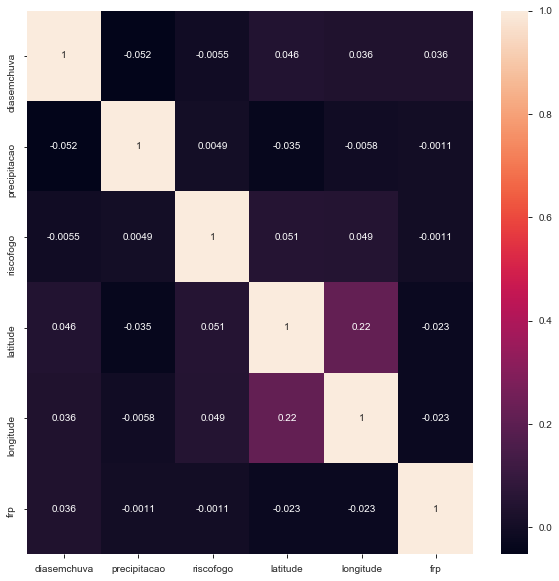

In [52]:
fig, ax = plt.subplots(figsize= (10,10))

sns.heatmap(fires_inpe.corr(), annot =True)

In [53]:
fires_inpe['fires'] = np.where(fires_inpe['frp'] > 0, 1, 0)

In [54]:
fires_inpe["dimention"] = pd.cut(x=fires_inpe["frp"], bins = 4, labels = ["Low", "Controlable", "Big", "Larger"])

fires_inpe.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,fires,dimention
datahora,,,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.80126,2.2,1,Low
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.12546,5.5,1,Low
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.60860,5.2,1,Low
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.04727,4.9,1,Low
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.05195,4.9,1,Low


In [55]:
fires_inpe['fires'].value_counts()

0    1021774
1     785836
Name: fires, dtype: int64

In [56]:
fires_inpe['dimention'].value_counts()

Low            1807473
Controlable        120
Big                 14
Larger               3
Name: dimention, dtype: int64

In [57]:
fires_inpe['diasemchuva_bin'] = np.where(fires_inpe['diasemchuva'] > 0, 1, 0)

In [58]:
fires_inpe['precipitacao_bin'] = np.where(fires_inpe['precipitacao'] > 0, 1, 0)

In [59]:
fires_inpe['riscofogo_bin'] = np.where(fires_inpe['riscofogo'] > 0, 1, 0)

In [60]:
fires_inpe.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,fires,dimention,diasemchuva_bin,precipitacao_bin,riscofogo_bin
datahora,,,,,,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,Brasil,PARA,JURUTI,Amazonia,0.0,0.0,0.0,-2.25394,-55.80126,2.2,1,Low,0,0,0
2019-09-03 17:42:00,NPP-375,Brasil,MATO GROSSO,COMODORO,Amazonia,0.0,0.0,0.0,-13.18994,-60.12546,5.5,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,Brasil,PARA,FARO,Amazonia,0.0,0.0,0.0,-1.90173,-56.60860,5.2,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39931,-60.04727,4.9,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,Brasil,RORAIMA,UIRAMUTA,Amazonia,0.0,0.0,0.0,4.39865,-60.05195,4.9,1,Low,0,0,0


In [61]:
fires_inpe['diasemchuva_bin'].value_counts()

1    961037
0    846573
Name: diasemchuva_bin, dtype: int64

In [62]:
fires_inpe.dtypes

satelite              object
pais                  object
estado                object
municipio             object
bioma                 object
diasemchuva          float64
precipitacao         float64
riscofogo            float64
latitude             float64
longitude            float64
frp                  float64
fires                  int32
dimention           category
diasemchuva_bin        int32
precipitacao_bin       int32
riscofogo_bin          int32
dtype: object

In [63]:
fires_inpe['precipitacao_bin'].value_counts()

0    1369908
1     437702
Name: precipitacao_bin, dtype: int64

In [64]:
fires_inpe['riscofogo_bin'].value_counts()

1    1075703
0     731907
Name: riscofogo_bin, dtype: int64

In [65]:
#fires_inpe.to_csv(r"fires_inpe_clean.csv")

In [66]:
#After orientation:

#need to clean more:

In [67]:
fires_inpe.drop(columns = ['pais', 'bioma'], inplace = True)

In [68]:

fires_inpe.head()

,satelite,estado,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,fires,dimention,diasemchuva_bin,precipitacao_bin,riscofogo_bin
datahora,,,,,,,,,,,,,,
2019-09-03 17:48:00,NPP-375,PARA,JURUTI,0.0,0.0,0.0,-2.25394,-55.80126,2.2,1,Low,0,0,0
2019-09-03 17:42:00,NPP-375,MATO GROSSO,COMODORO,0.0,0.0,0.0,-13.18994,-60.12546,5.5,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,PARA,FARO,0.0,0.0,0.0,-1.90173,-56.60860,5.2,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39931,-60.04727,4.9,1,Low,0,0,0
2019-09-03 17:48:00,NPP-375,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39865,-60.05195,4.9,1,Low,0,0,0


In [69]:
#putting the satélites in a small group:

#satelites_fire= ['NPP-375', 'GOES-16', 'NOAA-19', 'AQUA_M-M', 'MSG-03', 'TERRA_M-M','METOP-B', 'TERRA_M-T', 'AQUA_M-T', 'NOAA-18D', 'NOAA-18','NOAA-19D', 'NOAA-20', 'NOAA-15D', 'NOAA-15', 'NOAA-20D','METOP-C']

#for el in satelites_fire:
#    if el == 'NPP-375':
#fires_inpe['satelite'] = np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'NPP')
#    elif el == 'NOAA-19' or el == 'NOAA-18D' or el == 'NOAA-18' or el =='NOAA-19D' or el == 'NOAA-20' or el == 'NOAA-15D' or el == 'NOAA-15' or el == 'NOAA-20D':
#        fires_inpe['satelite']= np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'NOAA')            
#    elif el == 'AQUA_M-M' or el == 'AQUA_M-T':     
#         fires_inpe['satelite']=np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'AQUA')             
#    elif el == 'TERRA_M-M' or el == 'TERRA_M-T':  
#         fires_inpe['satelite']=np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'TERRA')
#    elif el == 'METOP-B' or el == 'METOP-C':  
#         fires_inpe['satelite']=np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'METOP')
#    elif el == 'GOES-16':  
#         fires_inpe['satelite']=np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'GOES')                  
#    else:
#         fires_inpe['satelite']=np.where( fires_inpe['satelite'].isin(satelites_fires), fires_inpe['satelite'], 'MSG') '''
      


In [70]:
#fires_inpe.drop(columns = ['latitude', 'longitude'], inplace = True)

In [71]:
fires_inpe.dtypes

satelite              object
estado                object
municipio             object
diasemchuva          float64
precipitacao         float64
riscofogo            float64
latitude             float64
longitude            float64
frp                  float64
fires                  int32
dimention           category
diasemchuva_bin        int32
precipitacao_bin       int32
riscofogo_bin          int32
dtype: object

In [72]:
fires_inpe.satelite= fires_inpe.satelite.apply(lambda x: x.split('-')[0])

In [73]:
fires_inpe.satelite.value_counts()

NPP        622271
NOAA       620116
GOES       363038
AQUA_M     101450
TERRA_M     62125
METOP       33043
MSG          5567
Name: satelite, dtype: int64

In [74]:
fires_inpe.satelite= fires_inpe.satelite.apply(lambda x: x.split('_')[0])

In [75]:
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('NPP'), 'SERVER'] = 'NPP'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('NOAA'), 'SERVER'] = 'NOAA'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('AQUA'), 'SERVER'] = 'AQUA'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('TERRA'), 'SERVER'] = 'TERRA'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('METOP'), 'SERVER'] = 'METOP'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('GOES'), 'SERVER'] = 'GOES'
#fires_inpe_clean.loc[fires_inpe['satelite'].str.contains('MSG'), 'SERVER'] = 'MSG'

In [76]:
fires_inpe['satelite'].value_counts()

NPP      622271
NOAA     620116
GOES     363038
AQUA     101450
TERRA     62125
METOP     33043
MSG        5567
Name: satelite, dtype: int64

In [77]:

temp=pd.get_dummies(fires_inpe['estado'])


In [78]:
temp.head()

,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
datahora,,,,,,,,,
2019-09-03 17:48:00,0,0,0,0,0,1,0,0,0
2019-09-03 17:42:00,0,0,0,0,1,0,0,0,0
2019-09-03 17:48:00,0,0,0,0,0,1,0,0,0
2019-09-03 17:48:00,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,0,0,0,0,0,0,0,1,0


In [79]:
temp2=pd.get_dummies(fires_inpe['satelite'])
temp2.head()

,AQUA,GOES,METOP,MSG,NOAA,NPP,TERRA
datahora,,,,,,,
2019-09-03 17:48:00,0,0,0,0,0,1,0
2019-09-03 17:42:00,0,0,0,0,0,1,0
2019-09-03 17:48:00,0,0,0,0,0,1,0
2019-09-03 17:48:00,0,0,0,0,0,1,0
2019-09-03 17:48:00,0,0,0,0,0,1,0


In [80]:
#merge e depois faço o drop do estado.

In [81]:
frames = [fires_inpe, temp]

result_clean = pd.concat(frames, axis=1)

In [82]:
result_clean.head()

#clean= pd.merge(fires_inpe, temp, on= 'datahora') #need to use concat

,satelite,estado,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,fires,...,riscofogo_bin,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
datahora,,,,,,,,,,,,,,,,,,,,,
2019-09-03 17:48:00,NPP,PARA,JURUTI,0.0,0.0,0.0,-2.25394,-55.80126,2.2,1,...,0,0,0,0,0,0,1,0,0,0
2019-09-03 17:42:00,NPP,MATO GROSSO,COMODORO,0.0,0.0,0.0,-13.18994,-60.12546,5.5,1,...,0,0,0,0,0,1,0,0,0,0
2019-09-03 17:48:00,NPP,PARA,FARO,0.0,0.0,0.0,-1.90173,-56.60860,5.2,1,...,0,0,0,0,0,0,1,0,0,0
2019-09-03 17:48:00,NPP,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39931,-60.04727,4.9,1,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,NPP,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39865,-60.05195,4.9,1,...,0,0,0,0,0,0,0,0,1,0


In [83]:
frames = [result_clean, temp2]

result_clean2 = pd.concat(frames, axis=1)

In [84]:
result_clean2.head()

,satelite,estado,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,fires,...,RONDONIA,RORAIMA,TOCANTINS,AQUA,GOES,METOP,MSG,NOAA,NPP,TERRA
datahora,,,,,,,,,,,,,,,,,,,,,
2019-09-03 17:48:00,NPP,PARA,JURUTI,0.0,0.0,0.0,-2.25394,-55.80126,2.2,1,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:42:00,NPP,MATO GROSSO,COMODORO,0.0,0.0,0.0,-13.18994,-60.12546,5.5,1,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,NPP,PARA,FARO,0.0,0.0,0.0,-1.90173,-56.60860,5.2,1,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,NPP,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39931,-60.04727,4.9,1,...,0,1,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,NPP,RORAIMA,UIRAMUTA,0.0,0.0,0.0,4.39865,-60.05195,4.9,1,...,0,1,0,0,0,0,0,0,1,0


In [86]:
result_clean2.drop(columns = ['satelite', 'estado','municipio'], inplace = True)

In [88]:
result_clean2.dtypes

diasemchuva          float64
precipitacao         float64
riscofogo            float64
latitude             float64
longitude            float64
frp                  float64
fires                  int32
dimention           category
diasemchuva_bin        int32
precipitacao_bin       int32
riscofogo_bin          int32
ACRE                   uint8
AMAPA                  uint8
AMAZONAS               uint8
MARANHAO               uint8
MATO GROSSO            uint8
PARA                   uint8
RONDONIA               uint8
RORAIMA                uint8
TOCANTINS              uint8
AQUA                   uint8
GOES                   uint8
METOP                  uint8
MSG                    uint8
NOAA                   uint8
NPP                    uint8
TERRA                  uint8
dtype: object

In [89]:
result_clean2.drop(columns = ['fires', 'dimention','diasemchuva_bin', 'precipitacao_bin','riscofogo_bin'], inplace = True)

In [90]:
result_clean2.head()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,ACRE,AMAPA,AMAZONAS,MARANHAO,...,RONDONIA,RORAIMA,TOCANTINS,AQUA,GOES,METOP,MSG,NOAA,NPP,TERRA
datahora,,,,,,,,,,,,,,,,,,,,,
2019-09-03 17:48:00,0.0,0.0,0.0,-2.25394,-55.80126,2.2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:42:00,0.0,0.0,0.0,-13.18994,-60.12546,5.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,0.0,0.0,0.0,-1.90173,-56.60860,5.2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,0.0,0.0,0.0,4.39931,-60.04727,4.9,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2019-09-03 17:48:00,0.0,0.0,0.0,4.39865,-60.05195,4.9,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [91]:
result_clean2.to_csv(r"df_clean.csv")